# __Trabajo Final Métodos Estadisticos Avanzados__

# __Modelo de clasificación de retiros de empleados__

__Presentado por:__


Johan Sanchez Rojas

Juan Sebastian Moncada Aguilar

# __Introducción__

En el entorno empresarial actual, la retención de talento se ha convertido en un factor crítico para el éxito sostenible de las organizaciones. La capacidad de identificar a los colaboradores que se encuentran en riesgo de retiro es esencial para implementar estrategias proactivas que no solo preserven el conocimiento y la experiencia interna, sino que también fomenten un ambiente laboral que incentive la permanencia a largo plazo.

En este contexto, la aplicación de técnicas de aprendizaje automático (ML, por sus siglas en inglés) se presenta como una herramienta invaluable para prever patrones de comportamiento y tendencias que podrían indicar la probabilidad de retiro de un colaborador. Este modelo busca aprovechar la gran cantidad de datos disponibles en las empresas, desde historiales laborales hasta interacciones diarias, para construir un sistema predictivo capaz de identificar señales tempranas de desvinculación.

A través de la clasificación de colaboradores en riesgo de retiro, este modelo de ML no solo facilita la toma de decisiones proactivas por parte de los líderes y departamentos de recursos humanos, sino que también proporciona un enfoque personalizado para abordar las preocupaciones específicas de los empleados y mejorar su satisfacción laboral.

Este trabajo presenta un enfoque detallado sobre el desarrollo e implementación de un modelo de clasificación de colaboradores en riesgo de retiro, destacando las variables clave, la metodología de entrenamiento y validación, así como las posibles acciones correctivas que pueden derivarse de las predicciones del modelo. La integración efectiva de esta herramienta en la gestión de recursos humanos puede contribuir significativamente a la retención de talento y al fortalecimiento de la estabilidad laboral dentro de la organización.


# __Objetivo general__

Identificar a los empleados de la compañía que presentan un mayor riesgo de retiro a partir de la identificación de variables significativas y la posterior implementación de modelos de segmentación y clasificación.

# __Objetivos específicos__

1. **Identificación Temprana de Riesgos de Retiro:** Desarrollar un modelo de aprendizaje automático capaz de identificar de manera temprana a los colaboradores que están en riesgo de retirarse, utilizando datos históricos y actuales para prever patrones y tendencias.

2. **Optimización de Recursos Humanos:** Mejorar la eficiencia de los departamentos de recursos humanos al proporcionar una herramienta que permita focalizar sus esfuerzos en la retención de personal, identificando de manera precisa a aquellos colaboradores con mayor probabilidad de abandonar la empresa.

3. **Personalización en la Gestión de Talentos:** Facilitar la implementación de estrategias de retención personalizadas al entender las razones individuales que pueden llevar a un colaborador a considerar el retiro, permitiendo intervenciones específicas y adaptadas a las necesidades de cada empleado.

4. **Reducción de Costos Asociados a la Rotación:** Contribuir a la disminución de costos relacionados con la rotación de personal, como reclutamiento, selección y capacitación, al evitar la pérdida de talento calificado y experimentado dentro de la organización.

5. **Mejora Continua del Ambiente Laboral:** Fomentar un entorno laboral más saludable y satisfactorio al abordar proactivamente los factores que contribuyen al riesgo de retiro, promoviendo la comunicación abierta, el desarrollo profesional y la resolución de problemas antes de que se conviertan en motivos para la desvinculación.

### Carga de librerias

In [ ]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
### Kmedias
from sklearn.cluster import KMeans
##Metricas
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
### Dendrogramas
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import pairwise_distances
### Análisis descriptivo
from scipy import cluster
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
### visualización
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics import davies_bouldin_score

from sklearn.impute import KNNImputer
import seaborn as sns

### Carga de datos

**Fuente**: base de datos corporativa previamente anonimizada (Cementos Argos)

In [ ]:
data = "https://raw.githubusercontent.com/jseb4s/Statistics-Final-Project/ETL-V1/data/Consolidado.csv"
df = pd.read_csv(data, sep = ';', index_col = "PERSON ID")

In [ ]:
df.columns

Index(['POSITION', 'POS EMP GROUP', 'COUNTRY', 'COMPANY', 'BUSINESS UNIT',
       'DIVISION', 'DEPARTMENT', 'JOB LEVEL', 'EMPLOYEE STATUS',
       'EMPLOYEE GROUP', 'EMP DATE OF BIRTH', 'EMP HIRE DATE',
       'EMP ORIGINAL START DATE', 'CONTRACT TYPE', 'CONTRACT END DATE',
       'WORK RELATIONSHIP', 'BENEFITS TYPE', 'EMP GENDER',
       'EMP MARITAL STATUS', 'LOCATION', 'SUPERVISOR POSITION',
       'MONTHLY AMOUNT', 'ANNUAL SALARY', 'SINDICATO', 'DEPENDIENTES',
       'Bachelor', 'Doctorate', 'Elementary_school', 'High_school', 'Master',
       'Specialization', 'Technical', 'Years_Educ', 'RAZON_RETIRO',
       'FECHA_RETIRO', 'DETALLE_RETIRO', 'Years_Exp',
       'Department/Team interested in', 'Languages', 'Application',
       'Count_App', 'DESEMPEÑO', 'Calificacion_Competencias', 'Promocion',
       'COMPA RATIO', 'Antigüedad', 'Edad'],
      dtype='object')

In [ ]:
df.head()

,POSITION,POS EMP GROUP,COUNTRY,COMPANY,BUSINESS UNIT,DIVISION,DEPARTMENT,JOB LEVEL,EMPLOYEE STATUS,EMPLOYEE GROUP,...,Department/Team interested in,Languages,Application,Count_App,DESEMPEÑO,Calificacion_Competencias,Promocion,COMPA RATIO,Antigüedad,Edad
PERSON ID,,,,,,,,,,,,,,,,,,,,,
2000012212,CONDUCTOR(A) MIXER,EMPLOYEE,COL,CONCRETOS ARGOS S.A.,VICEPRESIDENCIA REGIONAL COLOMBIA,GERENCIA NEGOCIO INDUSTRIAL,JEFATURA PLANTA SAN MARCOS,TECHNICAL /OPERATIVES,TERMINATED,EMPLOYEE,...,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,10,53
2000000052,OPERADOR(A) PRODUCCION II,EMPLOYEE,COL,CEMENTOS ARGOS S.A.,VICEPRESIDENCIA REGIONAL COLOMBIA,GERENCIA PRODUCCION CEMENTERA,PROF PRODUCCION,TECHNICAL /OPERATIVES,ACTIVE,EMPLOYEE,...,NaN,1.0,MICROSOFT EXCEL / MICROSOFT EXCEL,2.0,NaN,NaN,FALSO,NaN,25,57
2000005408,SUPERVISION MEDIDA,EMPLOYEE,COL,CELSIA COLOMBIA S.A. E.S.P.,TRANSMISION Y DISTRIBUCION,MANTENIMIENTO TYD Y CONTROL DE ENERGIA,OPERACION Y MANTENIMIENTO DE LA MEDIDA ZONA VA...,SPECIALISTS,ACTIVE,EMPLOYEE,...,NaN,0.0,MICROSOFT EXCEL,1.0,3.0,NaN,FALSO,"1,278846567",16,53
2000000055,OPERADOR(A) PRODUCCION II,EMPLOYEE,COL,CEMENTOS ARGOS S.A.,VICEPRESIDENCIA REGIONAL COLOMBIA,GERENCIA PRODUCCION CEMENTERA,PROF PRODUCCION VIII,TECHNICAL /OPERATIVES,ACTIVE,EMPLOYEE,...,CEMENT PRODUCTION,0.0,MICROSOFT WORD / MICROSOFT EXCEL,2.0,NaN,NaN,FALSO,NaN,17,53
2000003126,GERENTE(A) CONTROLLING Y PLAN. TRIBUT.,EMPLOYEE,COL,CEMENTOS ARGOS S.A.,VICEPRESIDENCIA FINANCIERA,GERENCIA CONTROLLING Y PLAN. TRIBUTARIA,GERENCIA CONTROLLING Y PLAN. TRIBUTARIA,HIGH MANAGEMENT,ACTIVE,EMPLOYEE,...,NaN,1.0,NaN,NaN,3.0,3.0,FALSO,"1,093245106",16,55


### Delimitación del problema

Se decide limitar el análisis solo para la compañía Cementos Argos S.A Colombia, para quienes son empleados directos.

In [ ]:
df = df[(df['COUNTRY'] == "COL") & (df['COMPANY'] == "CEMENTOS ARGOS S.A.") & (df['EMPLOYEE GROUP'] == "EMPLOYEE")]

In [ ]:
columns_to_keep = ['POS EMP GROUP', 'BUSINESS UNIT', 'DIVISION','JOB LEVEL', 'EMPLOYEE STATUS','CONTRACT TYPE','WORK RELATIONSHIP', 'BENEFITS TYPE', 'EMP GENDER',
'EMP MARITAL STATUS', 'LOCATION','ANNUAL SALARY','SINDICATO', 'DEPENDIENTES','Bachelor',  'Elementary_school', 'High_school', 'Master', 'Specialization','Doctorate','Years_Exp',
'Languages','Count_App', 'DESEMPEÑO', 'Calificacion_Competencias', 'Promocion', 'Antigüedad', 'Edad','RAZON_RETIRO','FECHA_RETIRO', 'DETALLE_RETIRO']

In [ ]:
df = df[columns_to_keep]

In [ ]:
# Por efectos practicos del cluster quitamos Razon_retiro, fecha_retiro, detalle_retiro y employee status
df_cluster = df
df_cluster = df_cluster.drop(['RAZON_RETIRO', 'FECHA_RETIRO', 'DETALLE_RETIRO', 'EMPLOYEE STATUS', 'LOCATION'], axis = 1)

### Imputación de NaN

In [ ]:
df_cluster.isna().sum()

POS EMP GROUP                   0
BUSINESS UNIT                   0
DIVISION                        0
JOB LEVEL                       0
CONTRACT TYPE                   0
WORK RELATIONSHIP               0
BENEFITS TYPE                 252
EMP GENDER                      0
EMP MARITAL STATUS              0
ANNUAL SALARY                   0
SINDICATO                       0
DEPENDIENTES                 1705
Bachelor                      626
Elementary_school             626
High_school                   626
Master                        626
Specialization                626
Doctorate                     626
Years_Exp                    1552
Languages                     626
Count_App                    1493
DESEMPEÑO                    1598
Calificacion_Competencias    1861
Promocion                       0
Antigüedad                      0
Edad                            0
dtype: int64

In [ ]:
df_cluster['BENEFITS TYPE'].fillna("DOES NOT APPLY", inplace = True)
df_cluster['DEPENDIENTES'].fillna(0, inplace = True)
df_cluster['Languages'].fillna(1, inplace = True)
df_cluster['Years_Exp'].fillna(df_cluster['Antigüedad'], inplace = True)

In [ ]:
df_cluster.isna().sum()

POS EMP GROUP                   0
BUSINESS UNIT                   0
DIVISION                        0
JOB LEVEL                       0
CONTRACT TYPE                   0
WORK RELATIONSHIP               0
BENEFITS TYPE                   0
EMP GENDER                      0
EMP MARITAL STATUS              0
ANNUAL SALARY                   0
SINDICATO                       0
DEPENDIENTES                    0
Bachelor                      626
Elementary_school             626
High_school                   626
Master                        626
Specialization                626
Doctorate                     626
Years_Exp                       0
Languages                       0
Count_App                    1493
DESEMPEÑO                    1598
Calificacion_Competencias    1861
Promocion                       0
Antigüedad                      0
Edad                            0
dtype: int64

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, subplot_titles=('Count_App', 'DESEMPEÑO', 'Calificacion_Competencias'))


fig.add_trace(go.Box(y=df_cluster['Count_App'], name='Count_App'), row=1, col=1)
fig.add_trace(go.Box(y=df_cluster['DESEMPEÑO'], name='DESEMPEÑO'), row=1, col=2)
fig.add_trace(go.Box(y=df_cluster['Calificacion_Competencias'], name='Calificacion_Competencias'), row=1, col=3)

fig.update_layout(height=400, width=1500, title_text="Distribución de Variables")


fig.show()

In [ ]:
df_cluster['Count_App'].fillna(df_cluster['Count_App'].median(), inplace = True)
df_cluster['DESEMPEÑO'].fillna(df_cluster['DESEMPEÑO'].median(), inplace = True)
df_cluster['Calificacion_Competencias'].fillna(df_cluster['Calificacion_Competencias'].median(), inplace = True)

In [ ]:
df_cluster.isna().sum()

POS EMP GROUP                  0
BUSINESS UNIT                  0
DIVISION                       0
JOB LEVEL                      0
CONTRACT TYPE                  0
WORK RELATIONSHIP              0
BENEFITS TYPE                  0
EMP GENDER                     0
EMP MARITAL STATUS             0
ANNUAL SALARY                  0
SINDICATO                      0
DEPENDIENTES                   0
Bachelor                     626
Elementary_school            626
High_school                  626
Master                       626
Specialization               626
Doctorate                    626
Years_Exp                      0
Languages                      0
Count_App                      0
DESEMPEÑO                      0
Calificacion_Competencias      0
Promocion                      0
Antigüedad                     0
Edad                           0
dtype: int64

*Esta depuración de variables se realizo teniendo en cuenta la investigación de Monsalve (2019).

# Procesamiento de datos

### Convertir en formato uint8 (binario) a las variables con respuesta de verdadero o falso. Los NaN se convierten en falso.

In [ ]:
df_cluster['SINDICATO'] = np.where(df_cluster['SINDICATO'].str.upper() == 'VERDADERO', 1, 0).astype('uint8')
df_cluster['Elementary_school'] = np.where(df_cluster['Elementary_school'].str.upper() == 'VERDADERO', 1, 0).astype('uint8')
df_cluster['High_school'] = np.where(df_cluster['High_school'].str.upper() == 'VERDADERO', 1, 0).astype('uint8')
df_cluster['Bachelor'] = np.where(df_cluster['Bachelor'].str.upper() == 'VERDADERO', 1, 0).astype('uint8')
df_cluster['Master'] = np.where(df_cluster['Master'].str.upper() == 'VERDADERO', 1, 0).astype('uint8')
df_cluster['Specialization'] = np.where(df_cluster['Specialization'].str.upper() == 'VERDADERO', 1, 0).astype('uint8')
df_cluster['Doctorate'] = np.where(df_cluster['Doctorate'].str.upper() == 'VERDADERO', 1, 0).astype('uint8')
df_cluster['Promocion'] = np.where(df_cluster['Promocion'].str.upper() == 'VERDADERO', 1, 0).astype('uint8')

In [ ]:
# Seleccionar solo columnas numéricas
df_cluster_numeric = df_cluster.select_dtypes(include=['int64', 'float64'])

# Aplicar KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
df_cluster_num_imputed = knn_imputer.fit_transform(df_cluster_numeric)

# Crear un nuevo DataFrame con los datos imputados
df_cluster_imputed = pd.DataFrame(df_cluster_num_imputed, columns=df_cluster_numeric.columns, index=df_cluster_numeric.index)

# Si necesitas, puedes unir de nuevo las columnas no numéricas después de la imputación
df_cluster = df_cluster_imputed.join(df_cluster.select_dtypes(exclude=['int64', 'float64']))

In [ ]:
df_cluster.isna().sum()

ANNUAL SALARY                0
DEPENDIENTES                 0
Years_Exp                    0
Languages                    0
Count_App                    0
DESEMPEÑO                    0
Calificacion_Competencias    0
Antigüedad                   0
Edad                         0
POS EMP GROUP                0
BUSINESS UNIT                0
DIVISION                     0
JOB LEVEL                    0
CONTRACT TYPE                0
WORK RELATIONSHIP            0
BENEFITS TYPE                0
EMP GENDER                   0
EMP MARITAL STATUS           0
SINDICATO                    0
Bachelor                     0
Elementary_school            0
High_school                  0
Master                       0
Specialization               0
Doctorate                    0
Promocion                    0
dtype: int64

In [ ]:
for columna, dtype in df_cluster.dtypes.iteritems():
    print(f'{columna}: {dtype}')

ANNUAL SALARY: float64
DEPENDIENTES: float64
Years_Exp: float64
Languages: float64
Count_App: float64
DESEMPEÑO: float64
Calificacion_Competencias: float64
Antigüedad: float64
Edad: float64
POS EMP GROUP: object
BUSINESS UNIT: object
DIVISION: object
JOB LEVEL: object
CONTRACT TYPE: object
WORK RELATIONSHIP: object
BENEFITS TYPE: object
EMP GENDER: object
EMP MARITAL STATUS: object
SINDICATO: uint8
Bachelor: uint8
Elementary_school: uint8
High_school: uint8
Master: uint8
Specialization: uint8
Doctorate: uint8
Promocion: uint8


<ipython-input-274-7d46751dad08>:1: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



### Generar variables dummies

Dado que la base cuenta con variables cualitativas, se procede a dicotomizar dichas variables para la correcta implementación de los modelos de segmentación y clasificación.

In [ ]:
# One hot encoding
# Columnas a dicotomizar
cuali_columns = ['POS EMP GROUP', 'BUSINESS UNIT', 'DIVISION', 'JOB LEVEL',
       'CONTRACT TYPE', 'WORK RELATIONSHIP', 'BENEFITS TYPE', 'EMP GENDER',
       'EMP MARITAL STATUS', 'DESEMPEÑO', 'Calificacion_Competencias']

df_cluster = pd.get_dummies(df_cluster, columns=cuali_columns, drop_first=True, dummy_na=False)

### Selección de variables numericas

In [ ]:
df_cluster_num = df_cluster.select_dtypes(include=['float', 'int'])
df_cluster_num

,ANNUAL SALARY,DEPENDIENTES,Years_Exp,Languages,Count_App,Antigüedad,Edad
PERSON ID,,,,,,,
2000000052,60792018.0,2.0,25.0,1.0,2.0,25.0,57.0
2000000055,60792018.0,0.0,6.0,0.0,2.0,17.0,53.0
2000003126,606402588.0,1.0,16.0,1.0,3.0,16.0,55.0
2000000056,72950479.0,4.0,31.0,0.0,2.0,31.0,56.0
2000002858,161346910.0,3.0,10.0,1.0,3.0,19.0,45.0
...,...,...,...,...,...,...,...
2000002746,41483794.0,0.0,9.0,1.0,3.0,9.0,30.0
2000010301,57275212.0,1.0,31.0,0.0,4.0,16.0,40.0
2000003023,45706182.0,1.0,9.0,1.0,3.0,9.0,40.0


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=3, subplot_titles=('ANNUAL SALARY', 'DEPENDIENTES', 'Years_Exp', 'Languages', 'Antigüedad', 'Edad', 'Count_App'))


fig.add_trace(go.Box(y=df_cluster_num['ANNUAL SALARY'], name='Annual Salary'), row=1, col=1)
fig.add_trace(go.Box(y=df_cluster_num['DEPENDIENTES'], name='Dependientes'), row=1, col=2)
fig.add_trace(go.Box(y=df_cluster_num['Years_Exp'], name='Years_Exp'), row=1, col=3)
fig.add_trace(go.Box(y=df_cluster_num['Languages'], name='Languages'), row=2, col=1)
fig.add_trace(go.Box(y=df_cluster_num['Antigüedad'], name='Antigüedad'), row=2, col=2)
fig.add_trace(go.Box(y=df_cluster_num['Edad'], name='Edad'), row=2, col=3)
fig.add_trace(go.Box(y=df_cluster_num['Count_App'], name='Count_App'), row=3, col=1)

fig.update_layout(height=800, width=1500, title_text="Distribución de Variables")


fig.show()

In [ ]:
# Función ajustada para eliminar outliers de una sola columna
def eliminar_outliers_columna(df, nombre_columna):
    Q1 = df[nombre_columna].quantile(0.25)
    Q3 = df[nombre_columna].quantile(0.75)
    IQR = Q3 - Q1

    # Filtramos solo en la columna especificada, manteniendo el resto del DataFrame intacto
    mascara_outliers = ~((df[nombre_columna] < (Q1 - 1.5 * IQR)) | (df[nombre_columna] > (Q3 + 1.5 * IQR)))
    df_filtrado = df.loc[mascara_outliers]
    return df_filtrado

nombre_columna_interes = 'ANNUAL SALARY'
df_cluster_num = eliminar_outliers_columna(df_cluster_num, nombre_columna_interes)


In [ ]:
fig = make_subplots(rows=3, cols=3, subplot_titles=('ANNUAL SALARY', 'DEPENDIENTES', 'Years_Exp', 'Languages', 'Antigüedad', 'Edad', 'Count_App'))


fig.add_trace(go.Box(y=df_cluster_num['ANNUAL SALARY'], name='Annual Salary'), row=1, col=1)
fig.add_trace(go.Box(y=df_cluster_num['DEPENDIENTES'], name='Dependientes'), row=1, col=2)
fig.add_trace(go.Box(y=df_cluster_num['Years_Exp'], name='Years_Exp'), row=1, col=3)
fig.add_trace(go.Box(y=df_cluster_num['Languages'], name='Languages'), row=2, col=1)
fig.add_trace(go.Box(y=df_cluster_num['Antigüedad'], name='Antigüedad'), row=2, col=2)
fig.add_trace(go.Box(y=df_cluster_num['Edad'], name='Edad'), row=2, col=3)
fig.add_trace(go.Box(y=df_cluster_num['Count_App'], name='Count_App'), row=3, col=1)

fig.update_layout(height=800, width=1500, title_text="Distribución de Variables")


fig.show()

In [ ]:
#scaler = StandardScaler(with_mean=True, with_std=True)
#standardized_data = scaler.fit_transform(df_cluster_num)
#df_cluster_num_standardized = pd.DataFrame(standardized_data)

In [ ]:
#names = ['ANNUAL SALARY', 'DEPENDIENTES', 'Years_Exp', 'Languages', 'Count_App', 'COMPA RATIO', 'Antigüedad', 'Edad']
#df_cluster_num_standardized.columns = names

In [ ]:
#df_cluster_num_standardized = df_cluster_num_standardized.set_index(df_cluster_num.index)

In [ ]:
#df_cluster_num = df_cluster_num_standardized

### Selección de variables categoricas

In [ ]:
df_cluster_cat = df_cluster.select_dtypes(exclude=['float', 'int'])

### Consolidación de información

In [ ]:
df_process = df_cluster_num.merge(df_cluster_cat, left_index=True, right_index=True, how='left')

In [ ]:
df_process

,ANNUAL SALARY,DEPENDIENTES,Years_Exp,Languages,Count_App,Antigüedad,Edad,SINDICATO,Bachelor,Elementary_school,...,EMP MARITAL STATUS_DIVORCED,EMP MARITAL STATUS_MARRIED,EMP MARITAL STATUS_SEPARATED,EMP MARITAL STATUS_SINGLE,EMP MARITAL STATUS_UNKNOWN,EMP MARITAL STATUS_WIDOWED,DESEMPEÑO_2.0,DESEMPEÑO_3.0,Calificacion_Competencias_2.0,Calificacion_Competencias_3.0
PERSON ID,,,,,,,,,,,,,,,,,,,,,
2000000052,60792018.0,2.0,25.0,1.0,2.0,25.0,57.0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2000000055,60792018.0,0.0,6.0,0.0,2.0,17.0,53.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2000000056,72950479.0,4.0,31.0,0.0,2.0,31.0,56.0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2000002858,161346910.0,3.0,10.0,1.0,3.0,19.0,45.0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
2000000058,66871240.0,0.0,32.0,0.0,2.0,32.0,56.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000002746,41483794.0,0.0,9.0,1.0,3.0,9.0,30.0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2000010301,57275212.0,1.0,31.0,0.0,4.0,16.0,40.0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
2000003023,45706182.0,1.0,9.0,1.0,3.0,9.0,40.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Implementación clustering

__K Means__

El algoritmo K-Means es un método de agrupamiento que tiene como objetivo dividir un conjunto de datos en k grupos (clusters) basándose en características similares.

**Pasos básicos:**

1. **Inicialización:**
   - Seleccionar k centroides iniciales aleatorios.

2. **Asignación:**
   - Asignar cada punto de datos al centroide más cercano.

3. **Actualización:**
   - Recalcular los centroides basados en la media de los puntos asignados a cada cluster.

4. **Repetir:**
   - Repetir los pasos 2 y 3 hasta que converja.

Este algoritmo busca minimizar la varianza intra-cluster y maximizar la varianza inter-cluster.






In [ ]:
kmedias=KMeans(n_clusters=2, n_init = 10, random_state=6231).fit(df_process)

In [ ]:
print(kmedias.labels_) # Kmedias.labels_ arroja el numero del grupo de cada registro.
print(len(kmedias.labels_))

[1 1 1 ... 1 1 1]
2392


In [ ]:
df_process["Grupo"]=kmedias.labels_

In [ ]:
df_process.groupby("Grupo").mean()

,ANNUAL SALARY,DEPENDIENTES,Years_Exp,Languages,Count_App,Antigüedad,Edad,SINDICATO,Bachelor,Elementary_school,...,EMP MARITAL STATUS_DIVORCED,EMP MARITAL STATUS_MARRIED,EMP MARITAL STATUS_SEPARATED,EMP MARITAL STATUS_SINGLE,EMP MARITAL STATUS_UNKNOWN,EMP MARITAL STATUS_WIDOWED,DESEMPEÑO_2.0,DESEMPEÑO_3.0,Calificacion_Competencias_2.0,Calificacion_Competencias_3.0
Grupo,,,,,,,,,,,,,,,,,,,,,
0,1.170381e+08,0.927210,10.019064,1.086655,3.691508,12.483536,42.275563,0.057192,0.665511,0.022530,...,0.020797,0.467938,0.008666,0.374350,0.012132,0.003466,0.769497,0.206239,0.317158,0.675910
1,6.203606e+07,0.484848,14.607713,0.534986,2.928926,15.711846,45.072176,0.675482,0.141047,0.035813,...,0.008815,0.272176,0.009917,0.521763,0.009366,0.001653,0.945455,0.041322,0.035262,0.962534


### Grafico de codo

In [ ]:
within= [] ## Elbow Graph (codo), se tiende a elegir muchos grupos
for k in range(1,20):
    kmeanModel = KMeans(n_clusters=k, n_init = 10, random_state = 6231).fit(df_process)
    within.append(kmeanModel.inertia_)
fig=px.line(x=list(range(1,20)), y=within,  title="Within Variance")
fig.show()

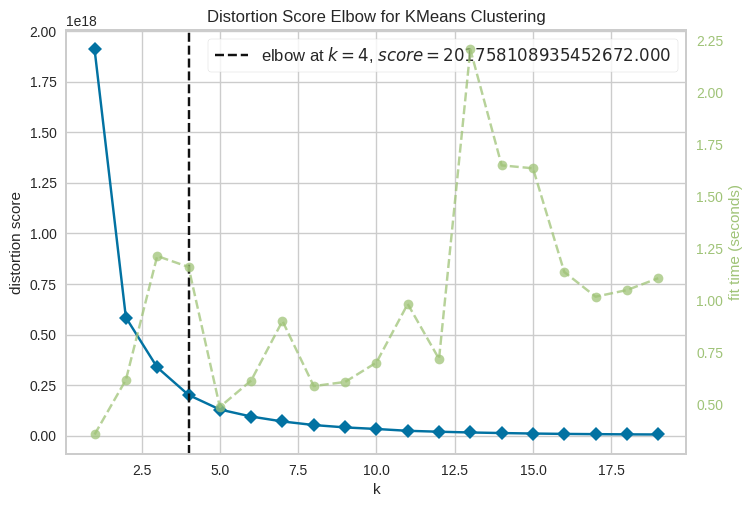

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(n_init = 10, random_state = 6231)
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(df_process)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Calinski- Harabasz

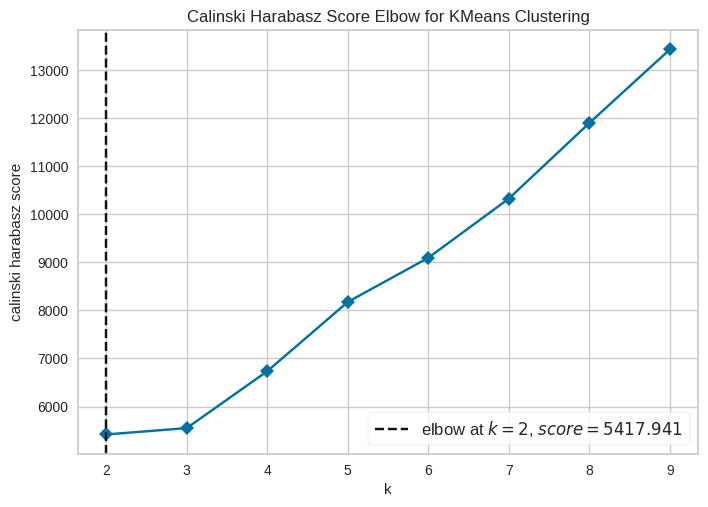

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
model = KMeans(n_init=10, random_state = 6231)
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabasz', timings=False
)

visualizer.fit(df_process)        # Fit the data to the visualizer
visualizer.show()

### Inercia

In [ ]:
for n_clusters in range(2, 10):
    # Crear un modelo K-Means con el número actual de clústeres
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=6231)
    kmeans.fit(df_process)
    # Calcular la inercia
    inertia = kmeans.inertia_

    # Imprimir el resultado para el número actual de clústeres
    print(f"{n_clusters}, Inertia: {inertia}")

2, Inertia: 5.842685017321603e+17
3, Inertia: 3.380141250547993e+17
4, Inertia: 2.0175810893546016e+17
5, Inertia: 1.2982829991149094e+17
6, Inertia: 9.514038858454182e+16
7, Inertia: 7.073616892292291e+16
8, Inertia: 5.309583281443533e+16
9, Inertia: 4.140402342946931e+16


### Indice Davies - Bouldin*

*Corresponde al método número 12 descrito en el portal [rdocumentation.org](https://www.rdocumentation.org/packages/NbClust/versions/3.0.1/topics/NbClust)

El índice de Davies-Bouldin (DB) es una métrica de evaluación de la calidad de la agrupación en análisis de clústeres. Mide la "separación" entre los clústeres y la "compacidad" de los clústeres en un conjunto de datos. Cuanto menor sea el valor del índice de Davies-Bouldin, mejor será la calidad de la agrupación.

La fórmula del índice de Davies-Bouldin es:

$$DB = \frac{1}{n} \sum_{i=1}^{n} \max_{i \neq j} \left( \frac{R_i + R_j}{d(C_i, C_j)} \right)$$


Cuanto menor sea el valor de DB, mejor será la calidad de la agrupación, indicando clústeres más separados y compactos.
Valores más altos de DB indican una calidad de agrupación más deficiente, con clústeres que están menos separados y/o menos compactos.

In [ ]:
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=6231)
    kmeans.fit(df_process)

    labels = kmeans.labels_

    db_score = davies_bouldin_score(df_process, labels)

    print(f"{n_clusters}, Davies-Bouldin Index: {db_score}")

2, Davies-Bouldin Index: 0.48182920831534526
3, Davies-Bouldin Index: 0.5924596532650257
4, Davies-Bouldin Index: 0.541680418826484
5, Davies-Bouldin Index: 0.48671100832440783
6, Davies-Bouldin Index: 0.5138000028604139
7, Davies-Bouldin Index: 0.4542918892888957
8, Davies-Bouldin Index: 0.4459707222992243
9, Davies-Bouldin Index: 0.462431736551212


Los resultados del indice muestran que con 5 grupos el agrupamiento es mucho más compacto, pues allí toma un valor de 0.487.

### Indice de Dunn*

*Corresponde al método número 26 descrito en el portal [rdocumentation.org](https://www.rdocumentation.org/packages/NbClust/versions/3.0.1/topics/NbClust)

El índice de Dunn mide la distancia mínima entre los centroides de clústeres diferentes. Cuanto mayor sea la distancia mínima entre clústeres, mejor será la calidad de la agrupación en términos de separación. Esta distancia mínima se denomina "interclúster mínimo".


$$\text{Dunn Index} = \frac{\text{Interclúster Mínimo}}{\text{Intraclúster Máximo}}$$

__Donde:__

- __Interclúster Mínimo:__ Es la distancia más corta entre los centroides de dos clústeres diferentes.
- __Intraclúster Máximo:__ Es la distancia más larga entre cualquier par de puntos dentro de un mismo clúster para todos los clústeres.

Cuanto mayor sea el valor del índice de Dunn, mejor será la calidad de la agrupación. Esto significa que los clústeres están bien separados y son compactos.
Valores más bajos del índice de Dunn indican una calidad de agrupación deficiente, con clústeres que están menos separados y/o menos compactos.

In [ ]:
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=6231)
    kmeans.fit(df_process)

    labels = kmeans.labels_

    #Calcula las distancias entre todos los pares de puntos de datos
    distances = pairwise_distances(df_process)

    #Calcula la distancia mínima entre clústeres
    min_intercluster_distance = np.min([np.min(distances[labels == i][:, labels != i]) for i in range(n_clusters)])

    #Calcula la distancia máxima dentro de un clúster
    max_intracluster_distance = np.max([np.max(distances[labels == i][:, labels == i]) for i in range(n_clusters)])

    #Indice de Dunn
    dunn_index = min_intercluster_distance / max_intracluster_distance

    print(f"{n_clusters}, Dunn Index: {dunn_index}")

2, Dunn Index: 0.005076795333077601
3, Dunn Index: 0.0020283116372283166
4, Dunn Index: 0.0019183226893073804
5, Dunn Index: 0.0026391955599715427
6, Dunn Index: 0.003470957360624391
7, Dunn Index: 0.003482910131491193
8, Dunn Index: 0.0017532811157816499
9, Dunn Index: 0.002104149164651119


Los resultados del indice de Dunn muestran que el valor mas alto se presenta con 2 clusters (0.007), indicando que esta cantidad de grupos puede llegar a tener un mejor desempeño.

### Indice de silueta

In [ ]:
## Indice de silueta
base=df_process
num_clusters = np.arange(2,20)
results = {}
for size in num_clusters:
    model = KMeans(n_clusters = size, n_init = 10, random_state = 6231).fit(base)
    predictions = model.predict(base)
    results[size] = silhouette_score(base, predictions)
best_size = max(results, key=results.get)
results

{2: 0.6673685542777962,
 3: 0.5269930835281207,
 4: 0.5732418132444534,
 5: 0.5846542050116865,
 6: 0.5702382714265796,
 7: 0.5858616136045021,
 8: 0.584234588011986,
 9: 0.5810727293763046,
 10: 0.558256693201405,
 11: 0.6479497014138107,
 12: 0.6453660082386152,
 13: 0.6576328399601272,
 14: 0.6553622580970457,
 15: 0.6618220079981081,
 16: 0.6703722202025724,
 17: 0.6760511698407324,
 18: 0.6726355770809692,
 19: 0.6766194879142843}

Los resultados del indice de silueta reflejan que con 2 clusters se obtiene un mejor desempeño en el agrupamiento.

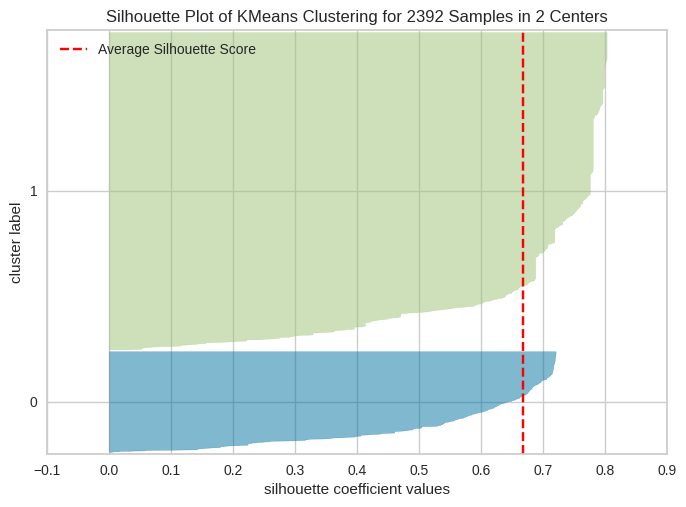

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2392 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, n_init=10,
                                      random_state=6231))

In [ ]:
silhouette_visualizer(KMeans(2, n_init = 10, random_state=6231), df_process, colors='yellowbrick')

In [ ]:
kmedias=KMeans(n_clusters=2, n_init = 10, random_state = 6231).fit(df_process) ### Salieron los grupos, ahora visualizar
kmedias.labels_
df_process["Grupo"]=kmedias.labels_
df_process

,ANNUAL SALARY,DEPENDIENTES,Years_Exp,Languages,Count_App,Antigüedad,Edad,SINDICATO,Bachelor,Elementary_school,...,EMP MARITAL STATUS_MARRIED,EMP MARITAL STATUS_SEPARATED,EMP MARITAL STATUS_SINGLE,EMP MARITAL STATUS_UNKNOWN,EMP MARITAL STATUS_WIDOWED,DESEMPEÑO_2.0,DESEMPEÑO_3.0,Calificacion_Competencias_2.0,Calificacion_Competencias_3.0,Grupo
PERSON ID,,,,,,,,,,,,,,,,,,,,,
2000000052,60792018.0,2.0,25.0,1.0,2.0,25.0,57.0,1,0,0,...,1,0,0,0,0,1,0,0,1,1
2000000055,60792018.0,0.0,6.0,0.0,2.0,17.0,53.0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
2000000056,72950479.0,4.0,31.0,0.0,2.0,31.0,56.0,1,0,0,...,1,0,0,0,0,1,0,0,1,1
2000002858,161346910.0,3.0,10.0,1.0,3.0,19.0,45.0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
2000000058,66871240.0,0.0,32.0,0.0,2.0,32.0,56.0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000002746,41483794.0,0.0,9.0,1.0,3.0,9.0,30.0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
2000010301,57275212.0,1.0,31.0,0.0,4.0,16.0,40.0,0,1,0,...,1,0,0,0,0,0,1,0,1,1
2000003023,45706182.0,1.0,9.0,1.0,3.0,9.0,40.0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [ ]:
df_process.groupby("Grupo", as_index= False). size()

,Grupo,size
0,0,577
1,1,1815


In [ ]:
df_process.groupby("Grupo", as_index= False).mean(numeric_only = True) ## revisar

,Grupo,ANNUAL SALARY,DEPENDIENTES,Years_Exp,Languages,Count_App,Antigüedad,Edad,SINDICATO,Bachelor,...,EMP MARITAL STATUS_DIVORCED,EMP MARITAL STATUS_MARRIED,EMP MARITAL STATUS_SEPARATED,EMP MARITAL STATUS_SINGLE,EMP MARITAL STATUS_UNKNOWN,EMP MARITAL STATUS_WIDOWED,DESEMPEÑO_2.0,DESEMPEÑO_3.0,Calificacion_Competencias_2.0,Calificacion_Competencias_3.0
0,0,1.170381e+08,0.927210,10.019064,1.086655,3.691508,12.483536,42.275563,0.057192,0.665511,...,0.020797,0.467938,0.008666,0.374350,0.012132,0.003466,0.769497,0.206239,0.317158,0.675910
1,1,6.203606e+07,0.484848,14.607713,0.534986,2.928926,15.711846,45.072176,0.675482,0.141047,...,0.008815,0.272176,0.009917,0.521763,0.009366,0.001653,0.945455,0.041322,0.035262,0.962534


### Distancia Kruskall-Wallis

In [ ]:
df_cluster_num["Grupo"]=kmedias.labels_
from scipy import stats  ### Kruskal wallis
a=df_cluster_num.columns
KruskalMetrica=[]
for i in range(len(a)):
  b,c=stats.kruskal(df_cluster_num[df_cluster_num["Grupo"]==0][a[i]], df_cluster_num[df_cluster_num["Grupo"]==1][a[i]])
  KruskalMetrica.append(b)
KruskalMetrica=pd.DataFrame(KruskalMetrica, index=a, columns=["Kruskal"])
KruskalMetrica.sort_values(["Kruskal"], ascending=False).drop("Grupo", axis=0)

<ipython-input-298-b9004bc49556>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Kruskal
ANNUAL SALARY,1315.728050
Languages,390.908896
DEPENDIENTES,131.147841
Years_Exp,58.645479
Count_App,54.978789
Antigüedad,28.940165
Edad,27.043013


### Análisis variables cuantitativas

Variables a analizar: Salario anual y cantidad de idiomas.

In [ ]:
fig = px.box(df_process, x="Grupo", y = "ANNUAL SALARY", color = "Grupo")
fig.show()

En el grupo 0 se observan personas con un salario anual que oscila entre los 191.9M y 0M.

Mientras que en el grupo 1 se observan personas con un salario anual que oscila entre los 196M y 767M.

In [ ]:
fig=px.violin(df_process, y=df_process['ANNUAL SALARY'], color=df_process.Grupo)
fig.show()

En el grupo 0 se observa una distribución de los datos mucho mas agrupada, con pocos valores atipicos y salarios anuales concentrados en la media.

Mientras que en el grupo 1 se observa una distribución mucho mas amplia y alrgada con algo de sesgo a la derecha. Se observa una mayor cantidad de outliers en la cola derecha de la distribución.

In [ ]:
fig = px.box(df_process, x="Grupo", y = "Years_Exp", color = "Grupo")
fig.show()

En el grupo 0 el 75% de las personas tiene 6 años de experiencia o menos, mientras que en el grupo 1 el 75% de las personas tiene 12.75 años de experiencia o menos.

En el grupo 0 se observan personas con un dominio de entre 0 y 4 idiomas.

Mientras que en el grupo 1 se observan personas con un salario anual que oscila entre los 196M y 767M.

In [ ]:
fig=px.violin(df_process, y=df_process.Years_Exp, color=df_process.Grupo)
fig.show()

### Coeficiente de contingencia

In [ ]:
df_cluster_cat["Grupo"]=kmedias.labels_
a=df_cluster_cat.columns
pvalor=[]
coeficiente = []
for i in range(len(a)):
  tabla=pd.crosstab(df_cluster_cat[a[i]], df_cluster_cat["Grupo"])
  b,c,d,e=chi2_contingency(tabla)
  pvalor.append(c)
  k=min(tabla.shape)
  CC=np.sqrt(k/(k-1))*np.sqrt(b/(b+df_cluster_cat.shape[0]))
  coeficiente.append(CC)
pvalor=pd.DataFrame(pvalor, index=a, columns=["Pvalue"])
coeficiente=pd.DataFrame(coeficiente, index=a, columns=["Coef"])
coeficiente.sort_values(["Coef"], ascending=False).drop("Grupo", axis=0)

ValueError: Length of values (2392) does not match length of index (2623)

### Análisis de variables cualitativas


Variables a analizar:
- Relación laboral ordinaria (1: si, 2: no)
- Estudios de maestria: (1: si, 2: no)

In [ ]:
tabla=df_cluster_cat.groupby(["WORK RELATIONSHIP_ORDINARY / ACTUAL", "Grupo"]).size()
tabla=tabla.reset_index(name="Conteo")
tabla
fig=px.bar(tabla, x=tabla['WORK RELATIONSHIP_ORDINARY / ACTUAL'], y=tabla.Conteo, facet_col=tabla.Grupo,)
fig.show()

KeyError: 'Grupo'

Se observa que en el grupo 0 predominan las personas con una relación laboral ordinaria, mientras que en el grupo 1 predominan las personas con otro tipo de relación laboral.

In [ ]:
tabla=df_cluster_cat.groupby(["Master", "Grupo"]).size()
tabla=tabla.reset_index(name="Conteo")
tabla
fig=px.bar(tabla, x=tabla['Master'], y=tabla.Conteo, facet_col=tabla.Grupo,)
fig.show()

Se observa que en el grupo 0 predominan las personas que no cuentan con estudios de maestria, mientras que en el grupo 1 predominan levemente las personas que tienen estudios de maestria.

## Descripción de los grupos

- Grupo 0: empleados con una media salarial de 66M, con una experiencia media de 6 años y donde prima la relación laboral ordinaria y los colaboradores sin maestria.

- Grupo 1: empleados con una media salarial de 262M, con una experiencia media de 7 años y donde priman las relaciones laborales no ordinarias (integrales) y los colaboradores que cuentan con posgrado.

# Modelo de pronostico

In [ ]:
df_process.columns

Index(['SINDICATO', 'Bachelor', 'Elementary_school', 'High_school', 'Master',
       'Specialization', 'Doctorate', 'Promocion',
       'BUSINESS UNIT_DIRECCION GENERAL CENTROAMERICA',
       'BUSINESS UNIT_DIRECCION GENERAL TRADING',
       ...
       'Calificacion_Competencias_3.0', 'ANNUAL SALARY', 'DEPENDIENTES',
       'Years_Exp', 'Languages', 'Count_App', 'COMPA RATIO', 'Antigüedad',
       'Edad', 'Grupo'],
      dtype='object', length=119)

In [ ]:
df_process = pd.concat([df_process, df['EMPLOYEE STATUS']], axis=1)

In [ ]:
df_process['EMPLOYEE STATUS'].value_counts()

ACTIVE        1998
TERMINATED     625
Name: EMPLOYEE STATUS, dtype: int64

## Matriz de correlación

In [ ]:
correlation_matrix = df_process.corr()

# Crea un heatmap interactivo
fig = px.imshow(correlation_matrix, color_continuous_scale='agsunset')

fig.update_xaxes(tickfont=dict(size=10))
fig.update_yaxes(tickfont=dict(size=10))
fig.update_layout(title="Correlation Heatmap", width=2000, height=1500)

fig.show()

<ipython-input-216-312ef8492314>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Prueba

La idea es que me traiga las variables con una correlación superior a 0.75

In [ ]:
correlation_threshold = 0.75
high_correlation_variables = []

for col in correlation_matrix.columns:
    correlated_vars = correlation_matrix.index[correlation_matrix[col] > correlation_threshold].tolist()
    correlated_vars.remove(col)
    if correlated_vars:
        high_correlation_variables.append((col, correlated_vars))

print("Variables con correlación por encima de 0.75:")
for var, correlated in high_correlation_variables:
    print(f"{var} está correlacionada con: {', '.join(correlated)}")

Variables con correlación por encima de 0.75:
SINDICATO está correlacionada con: JOB LEVEL_TECHNICAL /OPERATIVES, BENEFITS TYPE_UNION
BUSINESS UNIT_DIRECCION GENERAL TRADING está correlacionada con: DIVISION_DIRECCION GENERAL TRADING
BUSINESS UNIT_GERENCIA AW está correlacionada con: DIVISION_GERENCIA OPERACIONES AW
BUSINESS UNIT_GERENCIA CENTRO EMPRENDIMIENTO E INNOVACION está correlacionada con: DIVISION_GERENCIA CENTRO EMPRENDIMIENTO E INNOVACION
BUSINESS UNIT_GERENCIA CENTRO PROYECTOS TECNICOS está correlacionada con: DIVISION_GERENCIA CENTRO PROYECTOS TECNICOS
BUSINESS UNIT_GERENCIA LABORATORIO DIGITAL Y ANALITICA está correlacionada con: DIVISION_GERENCIA LABORATORIO DIGITAL Y ANALITICA
BUSINESS UNIT_GERENCIA LABORATORIO FUTURE TECH está correlacionada con: DIVISION_GERENCIA LABORATORIO FUTURE TECH
BUSINESS UNIT_GERENCIA TRANSFORMACION está correlacionada con: DIVISION_GERENCIA TRANSFORMACION
BUSINESS UNIT_PRESIDENCIA está correlacionada con: DIVISION_PRESIDENCIA
BUSINESS UNIT_US

## Regresión Logistica

__Algoritmo de Regresión Logística__

La Regresión Logística es un modelo de regresión utilizado para predecir la probabilidad de que una observación pertenezca a una categoría particular. Aunque se llama "regresión", se utiliza comúnmente para problemas de clasificación binaria.

**Pasos básicos:**

1. **Definición del Modelo:**
   - La regresión logística utiliza la función logística (también conocida como sigmoide) para modelar la relación entre las variables predictoras y la probabilidad de pertenecer a la clase positiva.

2. **Entrenamiento del Modelo:**
   - Ajustar los parámetros del modelo utilizando un conjunto de datos de entrenamiento. Se utiliza la maximización de la verosimilitud para encontrar los coeficientes que mejor explican los datos observados.

3. **Umbral de Decisión:**
   - Se establece un umbral (generalmente 0.5) para clasificar las predicciones en las clases binarias.

4. **Predicción:**
   - Utilizar el modelo entrenado para predecir las probabilidades o las clases de nuevas observaciones.




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Supongamos que tienes un DataFrame llamado df_process con tus datos, donde 'EMPLOYEE STATUS' es la columna que indica si un colaborador se retiró o no.

X = df_process.drop('EMPLOYEE STATUS', axis=1)  # Características
y = df_process['EMPLOYEE STATUS']  # Etiquetas


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir métricas de evaluación
print("Exactitud (Accuracy):", accuracy)
print("Matriz de Confusión:")
print(confusion)
print("Informe de Clasificación:")
print(classification_rep)

Exactitud (Accuracy): 0.758095238095238
Matriz de Confusión:
[[398   0]
 [127   0]]
Informe de Clasificación:
              precision    recall  f1-score   support

      ACTIVE       0.76      1.00      0.86       398
  TERMINATED       0.00      0.00      0.00       127

    accuracy                           0.76       525
   macro avg       0.38      0.50      0.43       525
weighted avg       0.57      0.76      0.65       525



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Random Forest

__Algoritmo Random Forest__

El algoritmo Random Forest es un poderoso método de aprendizaje supervisado utilizado tanto para clasificación como para regresión. Se basa en la construcción de múltiples árboles de decisión y la combinación de sus resultados para obtener predicciones más robustas y precisas.

**Pasos básicos:**

1. **Muestra Aleatoria:**
   - Seleccionar aleatoriamente N muestras del conjunto de datos de entrenamiento con reemplazo (bootstrap).

2. **Construcción de Árboles:**
   - Construir múltiples árboles de decisión utilizando las muestras seleccionadas en el paso 1. Cada árbol se entrena de manera independiente.

3. **Votación o Promedio:**
   - Para problemas de clasificación, se realiza una votación entre los árboles para determinar la clase final predicha. Para problemas de regresión, se toma el promedio de las predicciones de los árboles.

4. **Bagging:**
   - El proceso de muestreo y construcción de árboles se repite para formar un "bosque". La diversidad entre los árboles ayuda a reducir el sobreajuste.



Exactitud (Accuracy): 0.979047619047619
Matriz de Confusión:
[[394   4]
 [  7 120]]
Informe de Clasificación:
              precision    recall  f1-score   support

      ACTIVE       0.98      0.99      0.99       398
  TERMINATED       0.97      0.94      0.96       127

    accuracy                           0.98       525
   macro avg       0.98      0.97      0.97       525
weighted avg       0.98      0.98      0.98       525



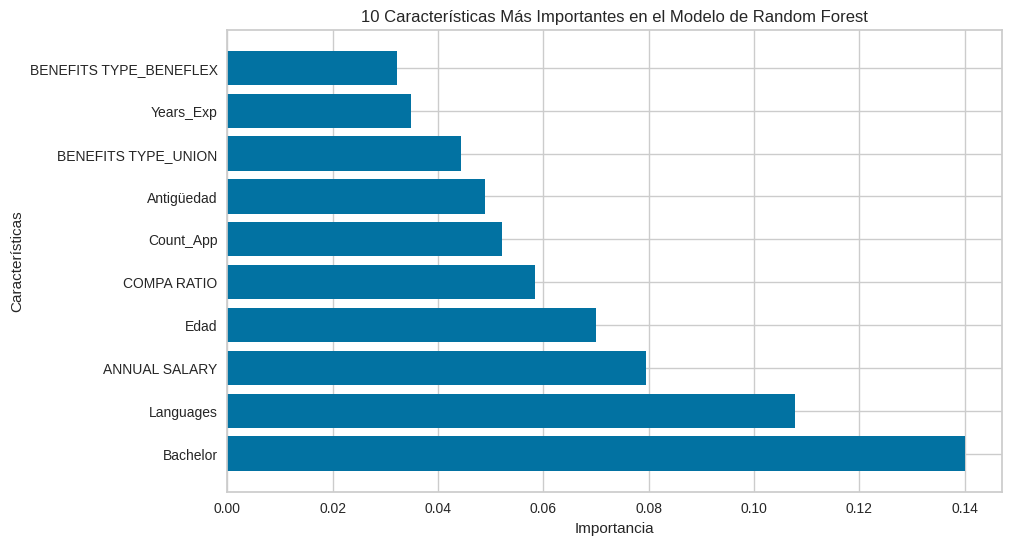

Las variables analizadas explican 0.6685552842525859 del modelo


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



X = df_process.drop('EMPLOYEE STATUS', axis=1)
y = df_process['EMPLOYEE STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 arboles

model.fit(X_train, y_train)
feature_importances = model.feature_importances_

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Exactitud (Accuracy):", accuracy)
print("Matriz de Confusión:")
print(confusion)
print("Informe de Clasificación:")
print(classification_rep)





# Selección de caracteristicas más importantes (10) usadas por el modelo


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('10 Características Más Importantes en el Modelo de Random Forest')
plt.show()

print(f"Las variables analizadas explican {top_10_features['Importance'].sum()} del modelo")

### Random Forest - Tuning

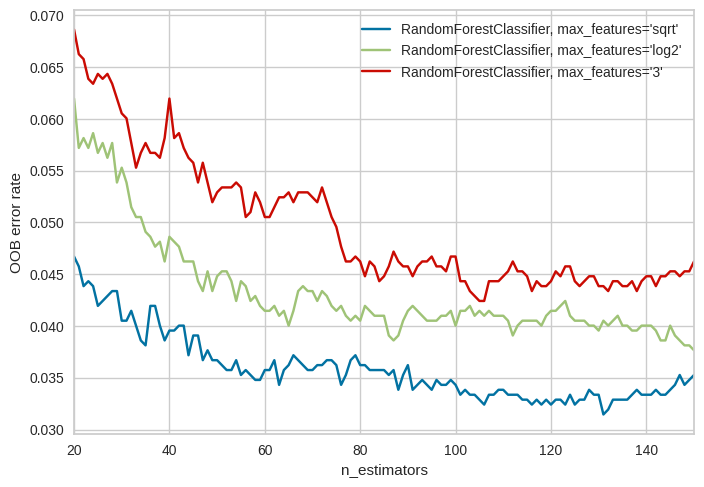

In [ ]:
from collections import OrderedDict
RANDOM_STATE=20
ensemble_RF= [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE,
                               max_samples=1000)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE, max_samples=1000)),
    ("RandomForestClassifier, max_features='3'",
        RandomForestClassifier(warm_start=True, max_features=3,
                               oob_score=True,
                               random_state=RANDOM_STATE,
                               max_samples=1000))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_RF)

# Numero de arboles
min_estimators = 20
max_estimators = 150

for label, clf in ensemble_RF:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)


        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

### Random Forest V2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



X = df_process.drop('EMPLOYEE STATUS', axis=1)
y = df_process['EMPLOYEE STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)


model = RandomForestClassifier(n_estimators=100, max_features = 'log2', max_samples=1000,  random_state=42)  # 100 arboles

model.fit(X_train, y_train)
feature_importances = model.feature_importances_

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Exactitud (Accuracy):", accuracy)
print("Matriz de Confusión:")
print(confusion)
print("Informe de Clasificación:")
print(classification_rep)

Exactitud (Accuracy): 0.9714285714285714
Matriz de Confusión:
[[394   4]
 [ 11 116]]
Informe de Clasificación:
              precision    recall  f1-score   support

      ACTIVE       0.97      0.99      0.98       398
  TERMINATED       0.97      0.91      0.94       127

    accuracy                           0.97       525
   macro avg       0.97      0.95      0.96       525
weighted avg       0.97      0.97      0.97       525



## Gradient Boosting

Exactitud (Accuracy): 0.96
Matriz de Confusión:
[[384  14]
 [  7 120]]
Informe de Clasificación:
              precision    recall  f1-score   support

      ACTIVE       0.98      0.96      0.97       398
  TERMINATED       0.90      0.94      0.92       127

    accuracy                           0.96       525
   macro avg       0.94      0.95      0.95       525
weighted avg       0.96      0.96      0.96       525



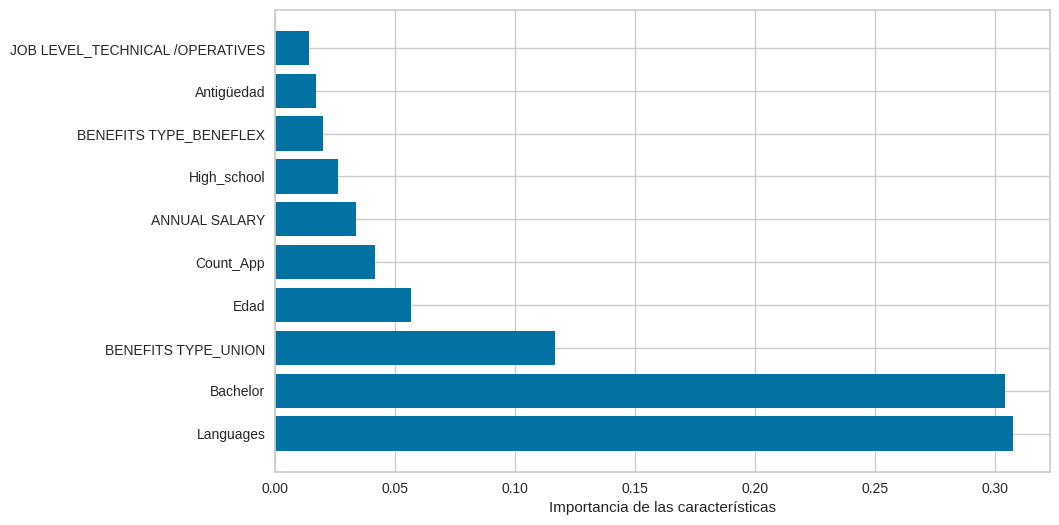

Las variables analizadas explican 0.9379901097812967 del modelo


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df_process.drop('EMPLOYEE STATUS', axis=1)
y = df_process['EMPLOYEE STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un modelo de Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Exactitud (Accuracy):", accuracy)
print("Matriz de Confusión:")
print(confusion)
print("Informe de Clasificación:")
print(classification_rep)


# Importancia de las características
feature_importance = model.feature_importances_

top_10_indices = feature_importance.argsort()[-10:][::-1]
top_10_features = X.columns[top_10_indices]
top_10_importance = feature_importance[top_10_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_features)), top_10_importance, align='center')
plt.yticks(range(len(top_10_features)), top_10_features)
plt.xlabel('Importancia de las características')
plt.show()


print(f"Las variables analizadas explican {top_10_importance.sum()} del modelo")

# __Bibliografia__
  1. Monsalve, L. (2019). Modelo predictivo para identificar factores que influyen en la rotación del personal en una organización del sector business process outsourcing (bpo) en Medellín. Universidad Nacional de Colombia, Facultad de Minas, Medellín.
  https://repositorio.unal.edu.co/handle/unal/77442